### **Step 1: Gather the Data & Utilities**

In [1]:
# Loading the required libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np

# For Visualization/EDA
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

Note: The titanic dataset has already been divided into training and test sets as train.csv and test.csv

In [2]:
# Read the train and test datasets from Kaggle to create two DataFrames using Pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Print the first few records of the train and test datasets
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [3]:
# Checking the dimensions of the train dataset
train.shape

(891, 12)

In [4]:
# Checking the distribution of the numerical columns
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Getting a summary on data types and missingness of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Step 2: Pre-process & Analyze the Data**

In [6]:
# Treating missing values (Age, Cabin, Embarked)
# Check the average Age by Gender
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [7]:
# Impute missing values of age by the respective average of the genders
train.loc[(train.Age.isnull())&(train.Sex=='female'),'Age'] = train["Age"][train["Sex"] == 'female'].mean()
train.loc[(train.Age.isnull())&(train.Sex=='male'),'Age'] = train["Age"][train["Sex"] == 'male'].mean()
train.Age.isnull().any()

False

In [8]:
# Check the Cabin distribution
#train.groupby('Cabin').size()
len(train.Cabin.unique())

148

In [9]:
# How much information does it provide?
train.Cabin.isnull().sum()/(train.shape[0])

0.7710437710437711

There are >100 cabin numbers with different sequence numbers and 77% of the data is missing, hence no use keeping this variable

In [10]:
# Dropping Cabin from the analysis
train.drop(['Cabin'],axis=1,inplace=True)

In [11]:
# Check the Embarked distribution
train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [12]:
# Since S=Southampton is the most occuring port of embarkation, impute the missing values with that (Mode)
train.loc[(train.Embarked.isnull()),'Embarked'] = "S"
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**We will look at the variables one by one to see if they provide any information, else we can drop them from the analysis (and the dataset itself).**

In [13]:
# Overall distribution of the survived passengers
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival Count')

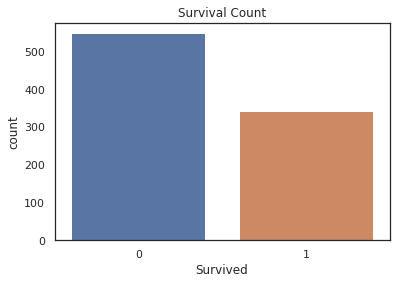

In [14]:
# Unfortunately, 62% of the passengers could not survive. Below is the bar chart for the absolute numbers
sns.countplot('Survived',data=train).set_title('Survival Count')

In [15]:
# Survival Rates by Gender
pd.crosstab(train.Survived, train.Sex, normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival by Gender')

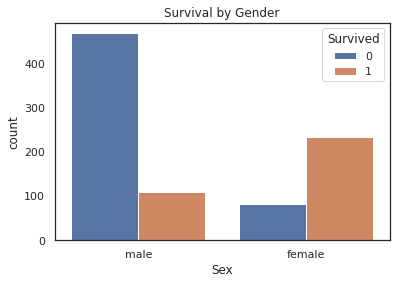

In [16]:
# Plot the survival count by Gender
sns.countplot('Sex',hue='Survived',data=train).set_title('Survival by Gender')

Females have very high chances of survival compared to the males - 68% vs. 32% respectively

In [17]:
# Next we will explore the Passenger Class variable
pd.crosstab(train.Survived, train.Pclass, normalize='index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival by Passenger Class')

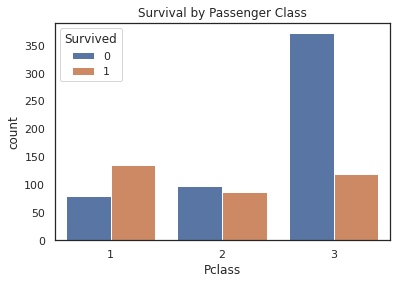

In [18]:
# Plot the survival count by Passenger Class
sns.countplot('Pclass',hue='Survived',data=train).set_title('Survival by Passenger Class')

At first glance, it looked like 35% survivors from 3rd class is not far behind the 40% from 1st class. But the maximum non survivors are also coming the 3rd class - 68%.
When we dug deeper into this by looking at the absolute count, we found that majority of passengers are from the 3rd class. Even though maximum passengers come from 3rd class, it clearly looks like the passengers from the 1st class (rich people) were given priority in terms of rescue/safety measures.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fare Distribution by Pclass')

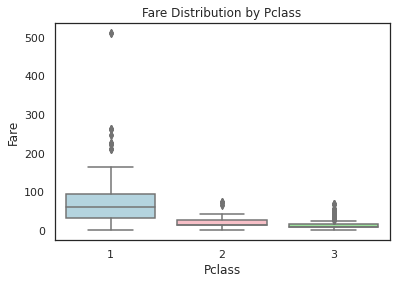

In [19]:
# Create a boxplot for the Fare distribution of each class
sns.boxplot("Pclass", "Fare", data=train, palette=["lightblue", "lightpink", "lightgreen"]).set_title('Fare Distribution by Pclass')

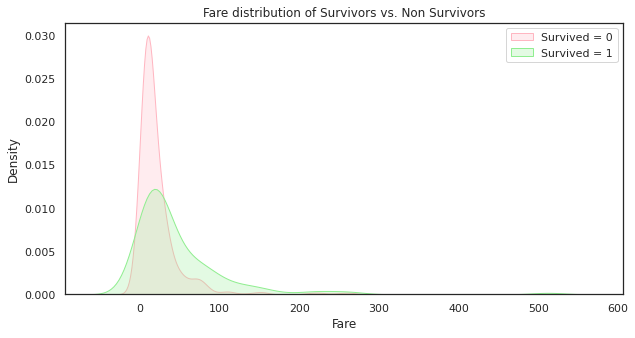

In [20]:
# Same story told by the fare distributions of survived vs. non survived passensers below
plt.figure(figsize = (10,5))
sns.kdeplot(train["Fare"][train.Survived == 0], color = "lightpink", shade = True)
sns.kdeplot(train["Fare"][train.Survived == 1], color = "lightgreen", shade = True)
plt.title("Fare distribution of Survivors vs. Non Survivors")
plt.legend(['Survived = 0', 'Survived = 1'])

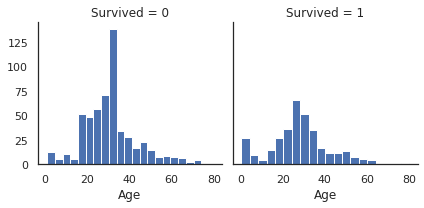

In [21]:
# Let's look into the Age factor
# Like fare, it is a continuous variable so let's plot a histogram to check the distribution
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age distribution of Survivors vs. Non Survivors by Gender')

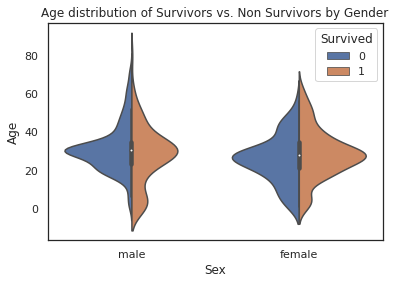

In [22]:
# Create a violin plot to check the distribution of Age across the Survivors vs. Non Survivors for each Gender
sns.violinplot("Sex","Age", hue="Survived", data = train, split = True).set_title("Age distribution of Survivors vs. Non Survivors by Gender")

From the histogram, we can see that the non survivors count is very high above 30 yrs of age and maximum survivors seem to be either < 10 yrs or between 20-30. From the violin plot split by Gender, we can say that, generally speaking, the females have higher chances of survival despite the given age. But below 15 there is some (very little though) evidence that young boys have better survival chances than girls of their age, but that could be just a matter of overall count

In [23]:
# Next, we explore the Embarked variable
pd.crosstab(train.Survived, train.Embarked, normalize='index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival by Port of Embarkation')

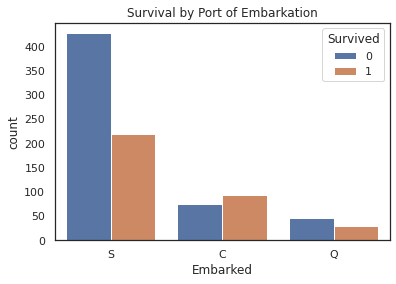

In [24]:
# Plot the absolute count of Survivors by Port
sns.countplot('Embarked',hue='Survived',data = train).set_title('Survival by Port of Embarkation')

From the cross tab, we see that Port S, Southampton seem to have the highest proportion of survivors, but even higher non-survivors. But it could be due to the majority of passengers from that port. The bar plot confirms that and we can also see that passengers boarding at Port C, Cherbourg have the maximum chances of survival.
Even though Port S has such a high number of passengers, it has very low survival rate. Let's dive deep into other factors explaining that.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


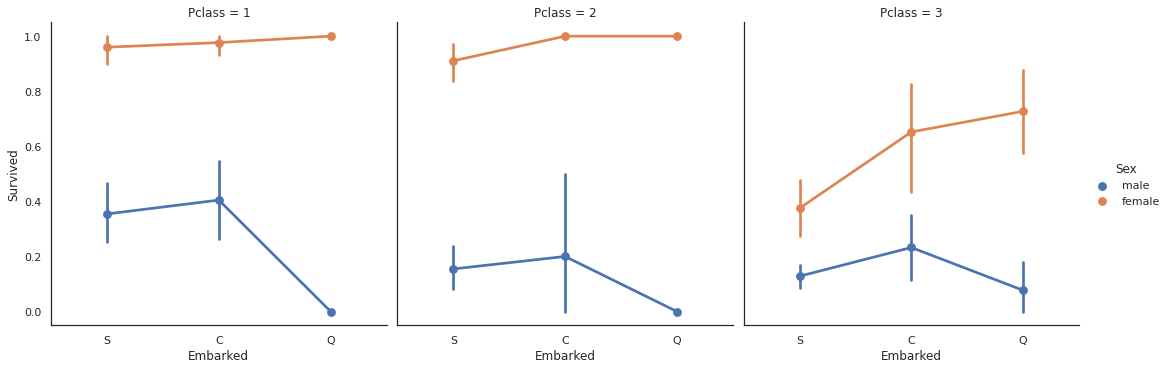

In [25]:
# Create a factor plot to include Pclass and Gender variables
sns.factorplot('Embarked', 'Survived', hue = 'Sex', col = 'Pclass', data = train)

The males from the port of Queentown have the least survival chances, whereas the females from the same port have the highest (Literally, "Queens' Town"!). Females from class 1 & 2, especially from Port C & Q have extremely high survival rates. Port S has slightly better survival chances than Port Q, only if the passenger is a male.

In [26]:
# Check if the ticket variable has any value add
#train.groupby('Ticket').size()
len(train.Ticket.unique())

681

Each passenger will have a different ticket number (except very few!). Probably there would be a pattern for different offers onboard but assuming class will take care of that, so there is no value add to the analysis from this variable.

In [27]:
# Drop the ticket variable
train.drop(['Ticket'],axis=1,inplace=True)

In [28]:
# Next, let's explore the SibSp variable
pd.crosstab(train.Survived, train.SibSp, normalize='index')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,0.724954,0.176685,0.027322,0.021858,0.027322,0.009107,0.01275
1,0.614035,0.327485,0.038012,0.011696,0.008772,0.000000,0.00000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival rates of SibSp by Gender')

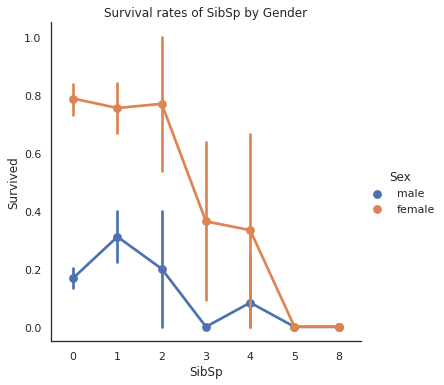

In [29]:
# Create a factor plot to include Gender
sns.factorplot('SibSp', 'Survived', hue = 'Sex', data = train)
plt.title('Survival rates of SibSp by Gender')

From the crosstab, we see that the highest number of survivors are from the category which does not have any sibling (or spouse) aboard. The factor plot reveals that if the passenger is a female, she still has very similar chances of survival whether travelling alone or with 1-2 siblings/spouse. Probably the "partner" would make sure that their female travel partner is safe first. Interestingly, the males have better chances of survival when they travel with a partner (mutual care!) and not just alone.

In [30]:
# Lastly, we take a look at the Parch variable
pd.crosstab(train.Survived, train.Parch, normalize='index')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,0.810565,0.096539,0.072860,0.003643,0.007286,0.007286,0.001821
1,0.681287,0.190058,0.116959,0.008772,0.000000,0.002924,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival rates of Parch by Gender')

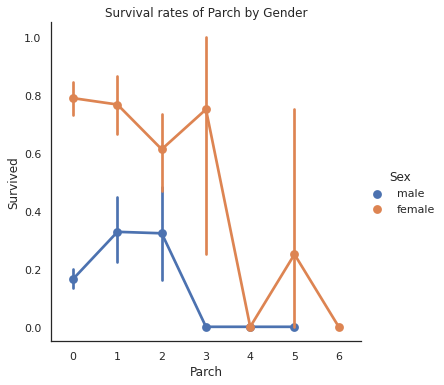

In [31]:
# Create a factor plot to include Gender
sns.factorplot('Parch', 'Survived', hue = 'Sex', data = train)
plt.title('Survival rates of Parch by Gender')

From the crosstab, we can see that the highest number of survivors are from the category which does not have any family aboard. But the story is similar to the sibling/spouse variable.
From the factor plot, we see that the females have very high chances of survival when they travel alone or the number of parents/children is 1-3. Males have some chances of survival when they travel alone or a little higher when the number of parents/children is 1-2, but zero chances when that exceeds 2. Overall, survival is more likely if travelling in alone or in a small family.

### **Step 3: Model Development**

**Now that the EDA is done, we are ready to process the data for the model development which also requires some feature engineering.**

In [32]:
# From the 12 columns of the training dataset, we have already dropped Cabin and Ticket
# We do not need Name and PassengerID, so let's drop them
train.drop(['Name','PassengerId'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [33]:
# Convert the male and female groups to integer form
train["Gender"] = 0
train.loc[train['Sex']=='male','Gender']=0
train.loc[train['Sex']=='female','Gender']=1

# Convert the Embarked classes to integer form
train["Port"] = 0
train.loc[train['Embarked']=='S','Port']=0
train.loc[train['Embarked']=='C','Port']=1
train.loc[train['Embarked']=='Q','Port']=2

# Create buckets for Age
train["Age_cat"] = 0
train.loc[train['Age']<=12,'Age_cat']=0
train.loc[(train['Age']>12)&(train['Age']<=20),'Age_cat']=1
train.loc[(train['Age']>20)&(train['Age']<=35),'Age_cat']=2
train.loc[(train['Age']>35)&(train['Age']<=50),'Age_cat']=3
train.loc[train['Age']>50,'Age_cat']=4

# Create buckets for Fare
train["Fare_cat"] = 0
train.loc[train['Fare']<=8,'Fare_cat']=0
train.loc[(train['Fare']>8)&(train['Fare']<=15),'Fare_cat']=1
train.loc[(train['Fare']>15)&(train['Fare']<=31),'Fare_cat']=2
train.loc[train['Fare']>31,'Fare_cat']=3

# Create a new variable family size and buckets for the same as travel_company
train["family_size"] = train["SibSp"] + train["Parch"] + 1
train["travel_company"] = 0
train.loc[train['family_size']<=1,'travel_company']=0
train.loc[(train['family_size']>1)&(train['family_size']<=4),'travel_company']=1
train.loc[train['family_size']>4,'travel_company']=2

In [34]:
# Remove the unneccessary vaiables and make sure the new variables got added
#train.describe()
#train.info()
train.drop(['Sex','Age','SibSp','Parch','Fare','Embarked','family_size'],axis=1,inplace=True)
#train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Gender          891 non-null    int64
 3   Port            891 non-null    int64
 4   Age_cat         891 non-null    int64
 5   Fare_cat        891 non-null    int64
 6   travel_company  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


Text(0.5, 1.0, 'Correlation Heat map for candidate variables')

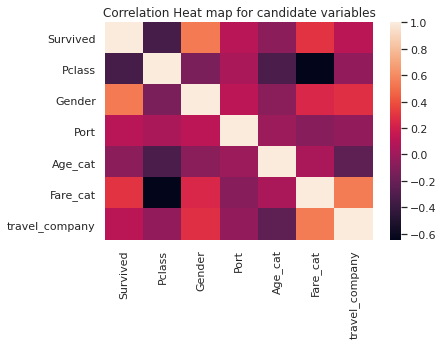

In [35]:
# Check the correlation among the rest of the available variables
sns.heatmap(train.corr()).set_title('Correlation Heat map for candidate variables')

There is slightly positive correlation between Fare category and travel company which could mean if you are travelling alone, you could adjust in cabins with lower fares but when you travel with family/partner, you would prefer better stay arrangements. There is also a strong negative correlation between Passenger class and Fare category because higher the class (1 being highest here), the more fare you pay. We can still keep these in the preliminary model and see if removing Fare gives a better model later.

**Time to finally start developing the prediction model.**


In [36]:
# Separating the response (y) and explanatory (x) variables
#X = train[["Pclass", "Gender", "Port", "Age_cat", "Fare_cat", "travel_company"]].values
# Removing the Fare category increases the model accuracy, so decided to exclude that from the final models
X = train[["Pclass", "Gender", "Port", "Age_cat", "travel_company"]].values
y = train["Survived"].values

In [37]:
# Splitting the dataset into test and training with 80% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [38]:
# Building the Logistic Regression model using the training dataset
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Testing the model with the test dataset (do not confuse with the actual Test dataset)
y_pred = LogReg.predict(X_test)
print('The model accuracy is', metrics.accuracy_score(y_pred, y_test))
print('The R-square value is', metrics.r2_score(y_pred, y_test)) 
#Although R-square doesn't provide a lot of info in binary models

The model accuracy is 0.7821229050279329
The R-square value is 0.07511923688394273


In [39]:
# Building the Decision tree model using the training dataset
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

# Testing the model with the test dataset (do not confuse with the actual Test dataset)
y_pred = DecTree.predict(X_test)
print('The model accuracy is', metrics.accuracy_score(y_pred, y_test))
print('The R-square value is', metrics.r2_score(y_pred, y_test))
#Although R-square doesn't provide a lot of info in binary models

The model accuracy is 0.8100558659217877
The R-square value is 0.14039548022598858


In [40]:
# Building the Random forest model using the training dataset
RandFor = RandomForestClassifier(max_depth = 6, min_samples_split=2, n_estimators = 100, random_state = 1)
RandFor.fit(X_train, y_train)

# Testing the model with the test dataset (do not confuse with the actual Test dataset)
y_pred = RandFor.predict(X_test)
print('The model accuracy is', metrics.accuracy_score(y_pred, y_test))
print('The R-square value is', metrics.r2_score(y_pred, y_test))
#Although R-square doesn't provide a lot of info in binary models

The model accuracy is 0.8268156424581006
The R-square value is 0.17792592592592604


In [41]:
# Also compare the feature importance of the Decision tree and Random forest models
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)

[0.18806676 0.53750269 0.01577471 0.10691512 0.15174072]
[0.18677212 0.52149811 0.04503794 0.13873524 0.1079566 ]


### **Step 4: Make Predictions on unseen data**

**Based on the above comparison, I choose to go with the Random Forest model as it has the highest accuracy score.**

In [42]:
# Pre-process and transform the data same as the training dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
# Impute missing values of age by the respective average of the genders
test.loc[(test.Age.isnull())&(test.Sex=='female'),'Age'] = test["Age"][test["Sex"] == 'female'].mean()
test.loc[(test.Age.isnull())&(test.Sex=='male'),'Age'] = test["Age"][test["Sex"] == 'male'].mean()
test.Age.isnull().any()

# Fare not included in the final model, but in case we want to revert, need to treat missingness
# Impute the missing value of fare by the pclass median
test.loc[(test.Fare.isnull())&(test.Pclass==1),'Fare'] = test["Fare"][test["Pclass"] == 1].median()
test.loc[(test.Fare.isnull())&(test.Pclass==2),'Fare'] = test["Fare"][test["Pclass"] == 2].median()
test.loc[(test.Fare.isnull())&(test.Pclass==3),'Fare'] = test["Fare"][test["Pclass"] == 3].median()
test.Fare.isnull().any()

# Since Cabin will be dropped so, not required to fill the missing values

# Convert the male and female groups to integer form
test["Gender"] = 0
test.loc[test['Sex']=='male','Gender']=0
test.loc[test['Sex']=='female','Gender']=1

# Convert the Embarked classes to integer form
test["Port"] = 0
test.loc[test['Embarked']=='S','Port']=0
test.loc[test['Embarked']=='C','Port']=1
test.loc[test['Embarked']=='Q','Port']=2

# Create buckets for Age
test["Age_cat"] = 0
test.loc[test['Age']<=12,'Age_cat']=0
test.loc[(test['Age']>12)&(test['Age']<=20),'Age_cat']=1
test.loc[(test['Age']>20)&(test['Age']<=35),'Age_cat']=2
test.loc[(test['Age']>35)&(test['Age']<=50),'Age_cat']=3
test.loc[test['Age']>50,'Age_cat']=4

# Create  buckets for family size/travel company
test["family_size"] = test["SibSp"] + test["Parch"] + 1
test["travel_company"] = 0
test.loc[test['family_size']>=1,'travel_company']=0
test.loc[(test['family_size']>1)&(test['family_size']<=4),'travel_company']=1
test.loc[test['family_size']>4,'travel_company']=2

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,Port,Age_cat,family_size,travel_company
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272597,0.447368,0.392344,35.560845,0.363636,0.464115,2.100478,1.839713,0.442584
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.856972,0.481622,0.685516,0.900013,1.519072,0.585848
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,2.000000,1.000000,0.000000
50%,1100.500000,3.000000,30.272362,0.000000,0.000000,14.454200,0.000000,0.000000,2.000000,1.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000,2.750000,2.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,2.000000,4.000000,11.000000,2.000000


In [44]:
# Extract the features from the test set and predict using the final model
test_features = test[["Pclass", "Gender", "Port", "Age_cat", "travel_company"]].values
test_Survived = RandFor.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived for the final submission
Titanic_Prediction = pd.DataFrame({'PassengerId' : test.loc[:,'PassengerId'],
                                   'Survived': test_Survived})

# Checking for the final dimensions : 418 x 2
print(Titanic_Prediction.shape)

# Export to a csv file
Titanic_Prediction.to_csv("Titanic_Prediction.csv", index=False)

(418, 2)


**Conclusion from the Titanic Survival Analysis (Exploratory Data Analysis + Model Dev + Pred) :-**
- Findings from EDA - If you were on "the Titanic", your chances to survive would be the highest if you are a young female (or a child), have enough money to buy high fared tickets to get into a 1st class cabin, travelling in small family and getting aboard at the Port of Cherbourg.
- Model development - Out of the three models tried out, Random Forest predicts the survival with the highest accuracy-83%. Logistic regression is good to start with, but for a model to better capture the interactions for a non linear data, decision tree is a better choice. Random Forest does even better than decision tree because overfitting could be a problem with the later. This can be reduced to some degree by creating an ensemble of randomized decison trees which essentially is what Random Forest does. Although, it can still be improved with more advanced techniques like SVM, AdaBoost, Naive Bayes, GBM, etc.